In [7]:
import pandas as pd
df = pd.read_csv('sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
df.duplicated().sum() # check for duplicates

0

In [8]:
# fix column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_', regex=False)


from the infos we notice that Date should be changed to datetime and Amount should become a float.  
The data has no empty values and no duplicates

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y') # convert date to datetime
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float) #convert amount into float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sales_person   1094 non-null   object        
 1   country        1094 non-null   object        
 2   product        1094 non-null   object        
 3   date           1094 non-null   datetime64[ns]
 4   amount         1094 non-null   float64       
 5   boxes_shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
def data_cleaning(df):
    '''
    This function cleans the data from the df
    Input/Output
    df = pd.Data Frame
    '''
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_', regex=False)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y') # convert date to datetime
    df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float) #convert amount into float
    return df


# EDA

In [ ]:
df.groupby('date')['amount']

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


In [ ]:
df.corr() 

/var/folders/bv/f0w21bd528q0yw0g8pxbb3740000gn/T/ipykernel_59485/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,amount,boxes_shipped,box_amount
amount,1.000000,-0.018827,0.232767
boxes_shipped,-0.018827,1.000000,-0.338462
box_amount,0.232767,-0.338462,1.000000


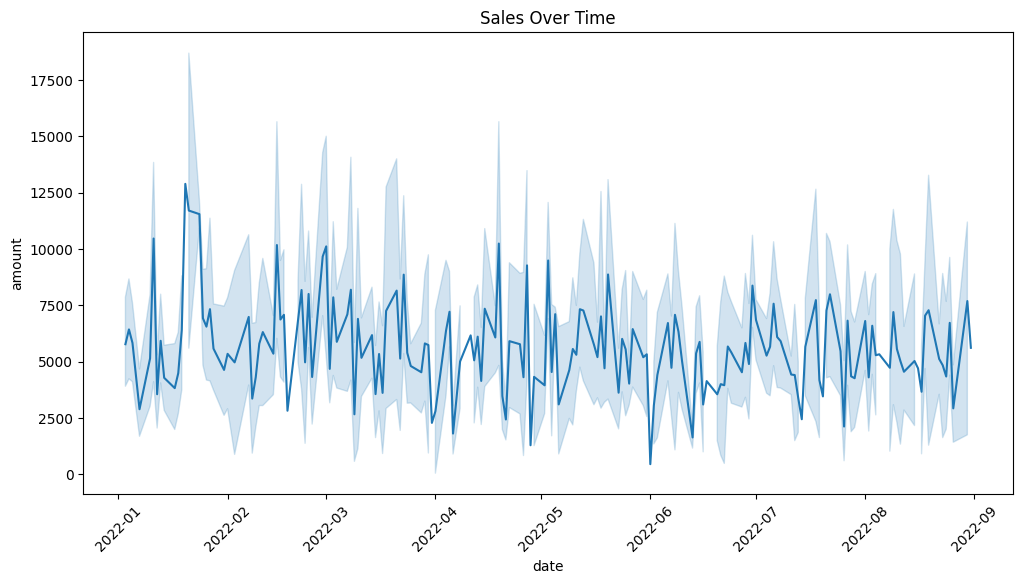

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='amount', data=df)
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()


In [22]:
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
# Aggregate by month (sum or mean, depending on what 'amount' represents)
monthly_df = df.groupby('month', as_index=False)['amount'].sum()
monthly_df

,month,amount
0,2022-01-01,896105.0
1,2022-02-01,699377.0
2,2022-03-01,749483.0
3,2022-04-01,674051.0
4,2022-05-01,752892.0
5,2022-06-01,865144.0
6,2022-07-01,803425.0
7,2022-08-01,743148.0
